In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import csv
import numpy as np
import PIL 
import pandas as pd


In [3]:
#!pip install kaggle
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [31]:
!ls

00_notebook_tutorial.ipynb	       lesson3-head-pose.ipynb
ahdd1.zip			       lesson3-imdb.ipynb
arabic_handwriting.ipynb	       lesson3-planet.ipynb
Arabic Handwritten Digits Dataset CSV  lesson4-collab.ipynb
csvtest.csv			       lesson4-tabular.ipynb
csvtestlabel.csv		       lesson5-sgd-mnist.ipynb
csvtrain.csv			       lesson6-pets-more.ipynb
csvtrainlabel.csv		       lesson6-rossmann.ipynb
data				       lesson7-human-numbers.ipynb
digits				       lesson7-resnet-mnist.ipynb
digits1				       lesson7-superres-gan.ipynb
digits2				       lesson7-superres-imagenet.ipynb
images				       lesson7-superres.ipynb
lesson1-pets.ipynb		       lesson7-wgan.ipynb
lesson2-download.ipynb		       my.png
lesson2-sgd.ipynb		       pix.png
lesson3-camvid.ipynb		       rossman_data_clean.ipynb
lesson3-camvid-tiramisu.ipynb	       Train + Test Matlab.mat


In [ ]:
def makeArray(row):
    pixels = np.array(row, dtype='uint8')
    pixels = pixels.reshape((28, 28)).T
    pixels = np.true_divide(pixels, 255)
    dim2 = np.zeros((28,28))
    dim3 = np.zeros((28,28))
    pix = np.stack((pixels, dim2,dim3), axis=2)
    print("pix")
    print(type(pix))
    return pix

In [ ]:
def makePlot(pix):
    filename = "digits1/%s.png" % i
    plt.imsave(filename, pix)
#    plt.imshow(pix)
    plt.close('all')
    return

In [38]:
#use this one
def makePic(row):
    pixels = np.array(row, dtype='uint8')
    pixels = pixels.reshape((28, 28)).T
    pixels = np.true_divide(pixels, 255)
    dim2 = np.zeros((28,28))
    dim3 = np.zeros((28,28))
    pix = np.stack((pixels, dim2,dim3), axis=2)
    filename = "digits2/%s.png" % i
    plt.imsave(filename, pix)
#    plt.imshow(pix)
    plt.close('all')
    return

In [5]:
csv = np.genfromtxt ('csvtrainlabel.csv', delimiter=",")
csv = csv[0:2000]
csv = csv.astype('int32')
csv = np.add(csv,1)

In [6]:
csv[csv == 10] = 0

In [7]:
csv

array([1, 2, 3, 4, ..., 7, 8, 9, 0], dtype=int32)

In [ ]:
## don't use this
#load labels into numpy array
#file 1.png =0, 2.png = 1, file 3.png = 2, file 999.png = 8
values = np.arange(0,10)
values
for x in range (1, 900):
    values = np.append(values, [0,1,2,3,4,5,6,7,8,9])


In [8]:
#np array that we'll make into the filenames
#from 1 to 2000
files = np.arange(1,2001)
files = files.astype(str)
files

array(['1', '2', '3', '4', ..., '1997', '1998', '1999', '2000'], dtype='<U21')

In [9]:
len(files)

2000

In [10]:
#convert to filenames
i = 0;
j = 1;
for file in files:
    files[i] = "%s.png" % j
    i += 1
    j += 1
    if i >= 2000: break

In [11]:
#confirm the filenames in the array
files

array(['1.png', '2.png', '3.png', '4.png', ..., '1997.png', '1998.png', '1999.png', '2000.png'], dtype='<U21')

In [12]:
#combine two arrays into dataframe and add header
df = pd.DataFrame({'name':files, 'label':csv})
df.tail()

,name,label
1995,1996.png,6
1996,1997.png,7
1997,1998.png,8
1998,1999.png,9
1999,2000.png,0


In [15]:
#make all the image files out of the train csv file
i = 0
with open('csvtrain.csv','r') as csvfile: 
    reader = csv.reader(csvfile, delimiter=',') 
    for ror in reader:
        #print(row)
        #makeArray(row)
        makePic(row)
        i += 1
        if i >= 2000: break

AttributeError: 'numpy.ndarray' object has no attribute 'reader'

In [16]:
bs = 24

In [17]:
path = '/home/ec2-user/SageMaker/course-v3/nbs/dl1/digits2/'
path

'/home/ec2-user/SageMaker/course-v3/nbs/dl1/digits2/'

In [ ]:
ImageDataBunch.from_df

In [18]:
tfms = get_transforms(do_flip=False)

In [19]:
data = ImageDataBunch.from_df(path=path, df = df, ds_tfms=tfms, size=24)

In [ ]:
img = open_image('/home/ec2-user/SageMaker/course-v3/nbs/dl1/digits2/8995.png')
img

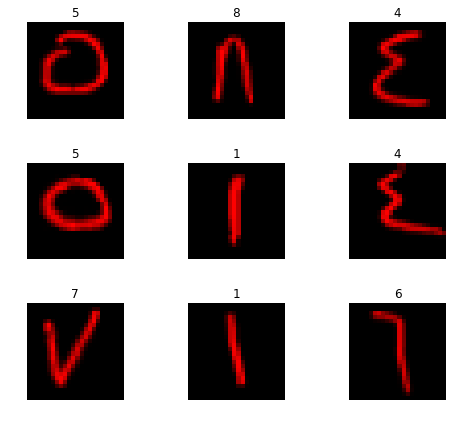

In [20]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)

In [21]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [22]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,2.005906,1.632867,0.577500
2,1.191764,0.470055,0.127500
3,0.849474,0.277690,0.077500
4,0.660209,0.251878,0.060000


In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


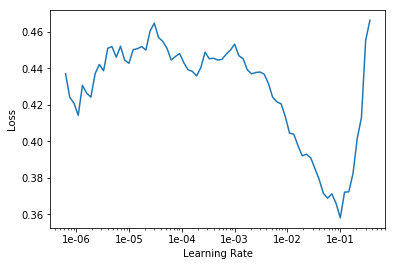

In [25]:
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(.006, .004))

epoch,train_loss,valid_loss,error_rate
1,0.422033,59.326241,0.790000
2,0.231225,0.082317,0.012500
3,0.150211,0.020913,0.005000


In [27]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit(6)

epoch,train_loss,valid_loss,accuracy
1,1.060467,1.439394,0.542500
2,0.727559,0.370489,0.910000
3,0.564830,0.210343,0.942500
4,0.467077,0.137898,0.962500
5,0.395020,0.114383,0.960000
6,0.357279,0.119383,0.965000


In [28]:
img = open_image('/home/ec2-user/SageMaker/course-v3/nbs/dl1/digits2/8995.png')
img

In [57]:
test = pd.read_csv('csvtest.csv', nrows=5)
test2 = test.iloc[[4]]
test2.values

array([[0, 0, 0, 0, ..., 0, 0, 0, 0]])

In [58]:
pixels = np.array(test2.values, dtype='uint8')
pixels = pixels.reshape((28, 28)).T
pixels = np.true_divide(pixels, 255)
dim2 = np.zeros((28,28))
dim3 = np.zeros((28,28))
pix = np.stack((pixels, dim2,dim3), axis=2)
filename = "test/%s.png" % 4
plt.imsave(filename, pix)
#    plt.imshow(pix)
plt.close('all')

In [59]:
img = open_image('/home/ec2-user/SageMaker/course-v3/nbs/dl1/test/4.png')
img

In [ ]:
#now to production
defaults.device = torch.device('cpu')
img = open_image(path/'lisianthus96.jpg')
img

In [60]:
#learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 5